<a href="https://colab.research.google.com/github/edmgjr/portifolio/blob/main/Limpesa_e_preprocessamento_de_dados_googleplaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

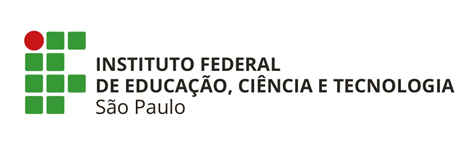

###Pacotes usados neste notebook

In [39]:
#Importanto pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#1. Dataset

---


Dataset: Google Play Store Apps: https://www.kaggle.com/lava18/google-play-store-apps

Este dataset contém dados sobre aplicativos da Google Play Store.
Cada observação (registro/linha) consiste de informações de um app, tais como categoria, avaliação, tamanho, entre outros.

##1.1 Importando o Dataset

In [40]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [41]:
!kaggle datasets download -d lava18/google-play-store-apps

google-play-store-apps.zip: Skipping, found more recently modified local copy (use --force to force download)


In [42]:
!unzip google-play-store-apps.zip

Archive:  google-play-store-apps.zip
replace googleplaystore.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [43]:
data = pd.read_csv('/content/googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##1.2 Informações básicas

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


O dataset possui **10841** registros e **13** atributos. Alguns atributos possuyem atributos null que precisará ser tratado. Será necessário converter os tipos de dados de alguns atributos.

#2. Limpeza e Pré-processamento de Dados

---

In [45]:
df = data.copy()

In [46]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##2.1 Category

In [47]:
#checando de há ruídos na coluna "Category"
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [48]:
#Verificando o porque da existencia da categoria "1.9"
df.query('Category == "1.9"')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [49]:
#Removendo o registro da categoria "1.9"
df.drop(index=[10472], inplace=True)
df.shape

(10840, 13)

In [50]:
df['Category'].isnull().sum()

0

##2.2 Rating

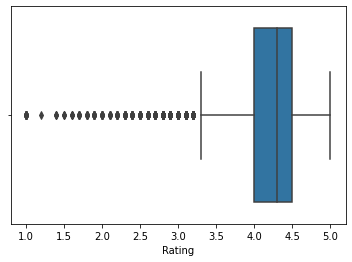

In [51]:
#Checando se possui outliers
sns.boxplot(x='Rating', data=df)

Por mais que o boxplot indique vários "outliers", considerando a distribuição, eles são valores aceitáveis e possíveis. Portanto não serão removidos

**Lidando com Nulls/NaN**

In [52]:
df.dropna(subset=['Rating'], inplace=True)

In [53]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [54]:
df['Rating'].isnull().sum()

0

##2.3 Reviews (número de avaliações)

In [55]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [57]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') #Convertendo para formato numeric, em caso de erro substitui por NaN

In [58]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


#2.4 Size

In [60]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

O atributo "Size" possui os sufixos "k" e "M" para representar escala. Há ainda alguns registros com valor "Varies with divice".

A conversão destas strings para números resulta em NaN:

In [61]:
pd.to_numeric(df['Size'], errors='coerce')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10834   NaN
10836   NaN
10837   NaN
10839   NaN
10840   NaN
Name: Size, Length: 9366, dtype: float64

A substituição do símbolo/sufixo pela sua escala: Ex., M por 000000, poderá resultar em números errados para os números decimais: Ex., 2.5M ==> 2.5000000

Para isso, os símbolos serão substituidos por suas notações científicas: Ex., 'M' ==> e+6

In [62]:
#valores de 'Size' que terminam com 'M'
size_com_final_M = df['Size'].str.endswith('M') #mask
size_com_final_M

0         True
1         True
2         True
3         True
4         True
         ...  
10834     True
10836     True
10837     True
10839    False
10840     True
Name: Size, Length: 9366, dtype: bool

In [63]:
df[size_com_final_M]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [64]:
#valores de 'Size' que terminam em 'k'
size_com_final_k = df['Size'].str.endswith('k')
df[size_com_final_k]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201k,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23k,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,79k,"10,000,000+",Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up
450,Caller ID +,COMMUNICATION,4.0,9498,118k,"1,000,000+",Free,0,Everyone,Communication,"June 7, 2016",5.28.0,2.3 and up
458,GO Notifier,COMMUNICATION,4.2,124346,695k,"10,000,000+",Free,0,Everyone,Communication,"July 6, 2014",2.8,2.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10732,Draw with FP sDraw,TOOLS,4.3,3268,467k,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676k,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
10763,FP Разбитый дисплей,FAMILY,4.5,922,552k,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [66]:
#removendo os símbolos
df['Size'] = df['Size'].str.replace('k', 'e+3', regex=False)
df['Size'] = df['Size'].str.replace('M', 'e+6', regex=False)

In [68]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [69]:
df.loc[size_com_final_k,['Size']]

,Size
58,201000.0
209,23000.0
384,79000.0
450,118000.0
458,695000.0
...,...
10732,467000.0
10755,676000.0
10763,552000.0
10832,582000.0


**Lidando com os valores NaN**

In [70]:
print(f"Quantidade de registros com 'Size' NaN: {df['Size'].isnull().sum()} ({(df['Size'].isnull().sum() * 100) / df.shape[0]:.2f}%)")

Quantidade de registros com 'Size' NaN: 1637 (17.48%)


Após as conversões para o 'Size', temos **1637** valores NaN, uma quantidade considerável de registros no dataset (17.48%). Estes valores correspondem aos registros com valores 'Varies with device'.

A seguinte estratégia será adotada: atribuir o valor da **mediana** do Size da categoria para cada registro NaN.

In [71]:
apps_com_size_null_bool = df['Size'].isnull()
categorias_com_size_null  = df.loc[apps_com_size_null_bool, 'Category'].unique()

for cat in categorias_com_size_null:
  categorias_bool = df['Category'] == cat 
  df.loc[categorias_bool & apps_com_size_null_bool, 'Size'] = df.loc[categorias_bool & ~apps_com_size_null_bool, 'Size'].median()

In [72]:
df['Size'].isnull().sum() #não existem mais registros com Size NaN

0

**Remoção de Outliers**

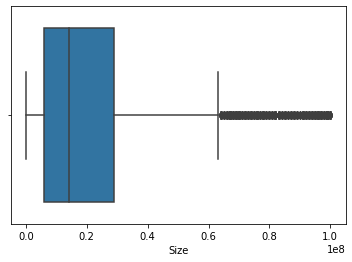

In [73]:
sns.boxplot(x='Size', data=df)

In [74]:
df.query('Size >= 1e8')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1080,Post Bank,FINANCE,4.5,60449,100000000.0,"1,000,000+",Free,0,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000.0,"10,000,000+",Free,0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000000.0,"100,000,000+",Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,"5,000,000+",Free,0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
1988,Hungry Shark Evolution,GAME,4.5,6074627,100000000.0,"100,000,000+",Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000000.0,500+,Paid,$15.99,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up
3973,Hungry Shark Evolution,GAME,4.5,6071542,100000000.0,"100,000,000+",Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100000000.0,"5,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",2.0.0.11,5.0 and up
5427,Ultimate Tennis,SPORTS,4.3,183004,100000000.0,"10,000,000+",Free,0,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3 and up
5530,The Walking Dead: Our World,GAME,4.0,22435,100000000.0,"1,000,000+",Free,0,Teen,Action,"August 1, 2018",1.1.0.3,5.0 and up


Por mais que a grande maioria dos apps (75%) são pequenos, outros não são necessariamente outliers para se remover.

É comum existir apps maiores, principalmente jogos. Portanto, não será removido nenhum outlier desse atributo

##2.5 Installs

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [76]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
